In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/kaggle/input/advertisement/Social_Network_Ads.csv')

In [3]:
data = data.iloc[:,2:]

In [4]:
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


## Splitting data for feature scaling

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    data.drop('Purchased', axis = 1),
    data['Purchased'],
    test_size=0.3,
    random_state=0
)

In [6]:
# print the shapes
print('x_train shape', x_train.shape)
print('x_test shape', x_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

x_train shape (280, 2)
x_test shape (120, 2)
y_train shape (280,)
y_test shape (120,)


## Standard Scaler

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [8]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [9]:
x_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [10]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)

In [11]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [12]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


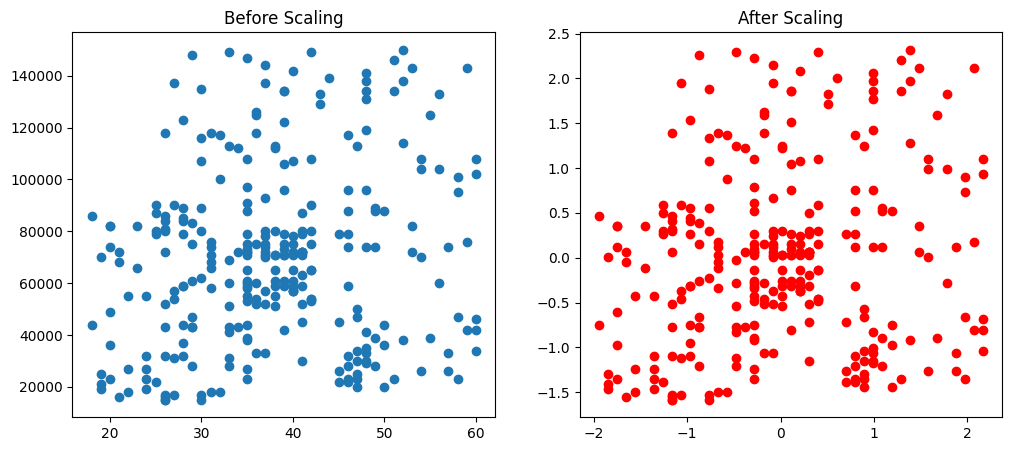

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (12,5))
ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title('Before Scaling')

ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'], color='red')
ax2.set_title('After Scaling')

plt.show()

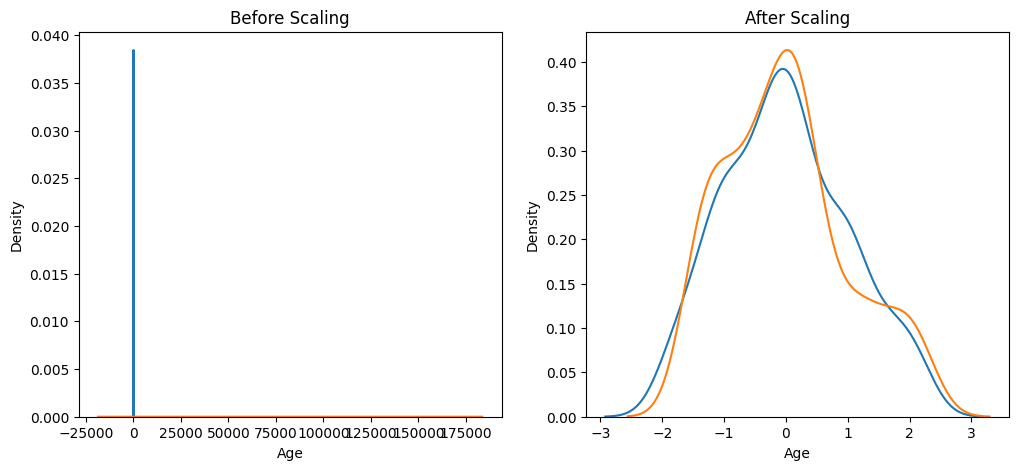

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax = ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(x_train_scaled['Age'], ax = ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)

plt.show()

## Comparing distributions with independent features

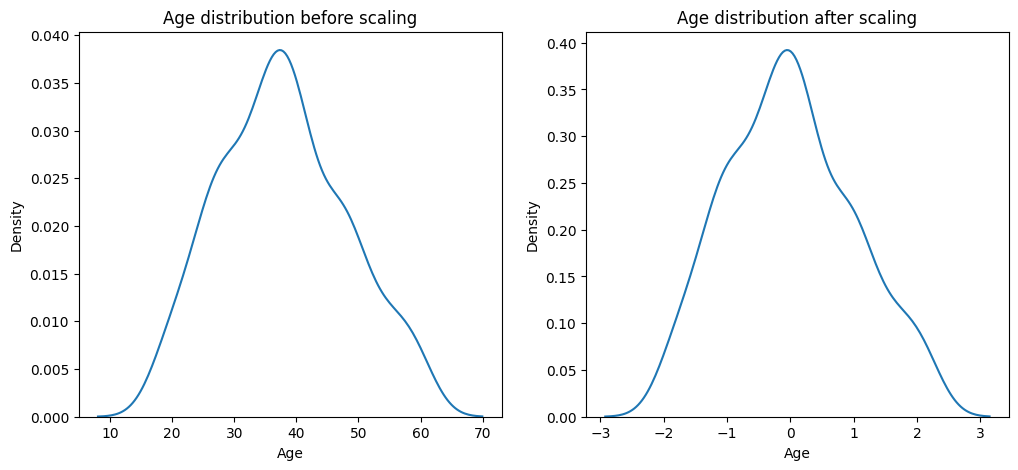

In [15]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title('Age distribution before scaling')
sns.kdeplot(x_train['Age'], ax=ax1)

ax2.set_title('Age distribution after scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)

plt.show()

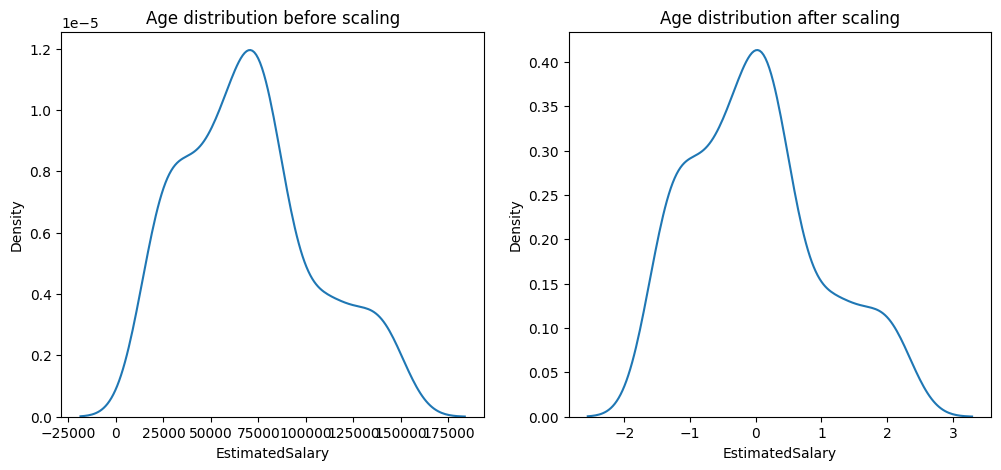

In [16]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title('Age distribution before scaling')
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

ax2.set_title('Age distribution after scaling')
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)

plt.show()

## Importance of scaling

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
scaled_lr = LogisticRegression()

In [18]:
lr.fit(x_train,y_train)
scaled_lr.fit(x_train_scaled,y_train)

LogisticRegression()

In [19]:
y_pred = lr.predict(x_test)
y_pred_scaled = scaled_lr.predict(x_test_scaled)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
print('Actual accuracy: ', accuracy_score(y_test, y_pred))
print('Scaled accuracy: ', accuracy_score(y_test,y_pred_scaled))

Actual accuracy:  0.6583333333333333
Scaled accuracy:  0.8666666666666667


## Decision tree will not have any impact of scaling

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [23]:
dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [24]:
y_pred = dt.predict(x_test)
y_pred_scaled = dt_scaled.predict(x_test_scaled)

In [25]:
print('Actual accuracy: ', accuracy_score(y_test, y_pred))
print('Scaled accuracy: ', accuracy_score(y_test,y_pred_scaled))

Actual accuracy:  0.875
Scaled accuracy:  0.8666666666666667


## Impact of outliers

The impact of outliers still remains same even after scaling